# Assignment 2: Exploring Why Civil Resistance Works

Fisrt, reading the data from .dta file

In [1]:
import pandas as pd
import pyreadstat

datafile = 'Data and Replication Files\\WCRWreplication.dta'
df, meta = pyreadstat.read_dta(datafile)
pd.set_option('display.max_columns', 85)

df.head(10)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,nonviol,viol,fselfdet,regchange,secession,other,success,limited,failure,ongoing,middleeast,americas,asia,fsu,europe,africa,lpolity,tpolity,lgovcap,tgovcap,regviol,violsim,extfor,statesup,regaid,sdirect,deltatpolity,deltatgdp,lduration,lmembers,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,cw,postcw,ixnNVmem,rgdppc,growthrgdppc,lupop,recur5,recur10,polityt10,polityt1,polityt5,politychanget10,politychanget1,politychanget5,politychanget0,authdum,deltatgovcap,memdum,lnpop,ixnNVpc,lpolity1,lcinc1,lgdppc,wars,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-9.0,-9.0,0.001764,0.001764,1,0,0.0,1,1,0,-6.0,NaN,6.998509,10.819778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,NaN,NaN,7.357556,1.0,1.0,-7.0,0.0,-7.0,2.0,9.0,2.0,0.0,1.0,-8.213022,0.0,8.819231,0.000000,-9.0,0.001348,NaN,0.0,1.694107,0.213400,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2.0,10.0,NaN,0.381362,1,0,1.0,0,1,0,0.0,NaN,6.593045,8.517193,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,-1.743013,0.0,NaN,NaN,10.0,0.244033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-9.0,-9.0,0.000345,0.000345,1,1,0.0,0,0,0,0.0,4.747277,5.886104,10.308952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.308952,1403.366654,0.234157,6.133398,1.0,1.0,7.0,-9.0,-6.0,16.0,0.0,3.0,0.0,1.0,NaN,0.0,8.585698,1.200712,-9.0,0.000345,1403.366654,0.0,2.797281,0.095000,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN,10.0,NaN,0.272078,1,0,1.0,0,0,0,0.0,NaN,7.979339,6.476973,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,-9.0,NaN,-3.0,NaN,NaN,NaN,NaN,0.0,-2.953412,0.0,NaN,NaN,10.0,0.222088,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,NaN,NaN,0.000529,0.000529,1,1,0.0,0,1,0,NaN,3.618188,5.886104,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,601.054160,3.681823,6.175867,0.0,0.0,-3.0,0.0,-3.0,-3.0,0.0,-3.0,NaN,0.0,-11.974962,1.0,8.212568,NaN,0.0,0.000529,601.054160,0.0,2.856470,0.386800,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0
5,NaN,5,100000.0,1920,1910,Mexico,Liberals and Radicals rebellion,Diaz regime,70.0,70.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-1.0,-1.0,0.006004,0.006004,1,1,0.0,0,0,0,8.0,NaN,8.202482,11.512925,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,6.486161,NaN,NaN,-3.0,-1.0,-3.0,-2.0,0.0,-2.0,0.0,1.0,-6.692080,0.0,NaN,NaN,-9.0,0.005104,NaN,NaN,NaN,NaN,-9.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN
6,1.0,3,50316.0,1924,1923,Mexico,Huerta led rebels,Obregon regime,70.0,70.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,-1.0,-1.0,0.007027,0.007027,1,0,0.0,0,1,0,0.0,NaN,6.308098,10.826078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,6.790097,NaN,NaN,-6.0,-3.0,-3.0,-5.0,-2.0,-2.0,0.0,1.0,-9.013132,0.0,NaN,NaN,-1.0,0.006953,NaN,NaN,NaN,NaN,-1.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN
7,0.0,3,50000.0,1930,1926,Mexico,Cristeros rebellion,Mexican regime,70.0,70.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,-3.0,-3.0,0.007294,0.007294,1,0,0.0,0,0,0,-2.0,NaN,7.286192,10.819778,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,7.247081,NaN,NaN,-6.0,-6.0,-6.0,-3.0,-3.0,-3.0,0.0,1.0,-7.983336,0.0,NaN,NaN,-3.0,0.007258,NaN,NaN,NaN,NaN,-3.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN
8,1.0,3,30000.0,1929,1929,Mexico,Escoban-led rebellion,Calles government,70.0,70.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,-3.0,-3.0,0.007375,0.007375,1,0,0.0,1,0,0,0.0,NaN,4.317488,10.308952,0.0,0.0,1.0,0

## 1. Frequency of Nonviolent and Violent Campaign End Years

In [2]:
#add decade column to dataset
df['decade'] = (df['eyear']//10)*10
grouped_data = df.groupby(['decade'])['viol', 'nonviol'].sum()

grouped_data

,viol,nonviol
decade,,
1900,14,0
1910,8,1
1920,18,1
1930,14,1
1940,21,5
1950,19,9
1960,17,7
1970,26,7
1980,13,32


please run this one twice, otherwise the plot does not show. I don't know why :(


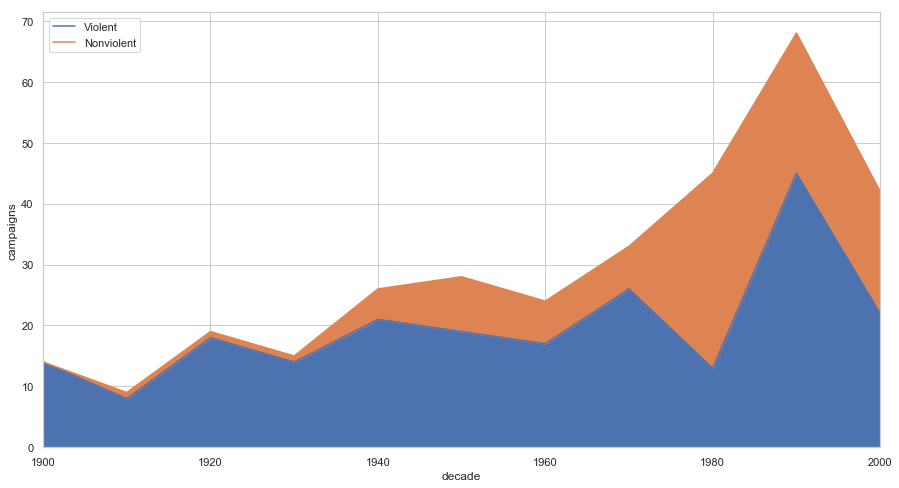

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#drawing the plot
sns.set(style = 'whitegrid')
diag = grouped_data.plot.area(grid = True, figsize=(15, 8))
diag.set_ylabel('campaigns')

#change legend labels and position
diag.legend(loc = 'upper left')
diag.legend(['Violent', 'Nonviolent'])

## 2: Number of Nonviolent Campaigns and Percentage of Success

In [6]:
#finding non violent campaigns and number of successes per decade
grouped_data2 = df[df['nonviol'] == 1].groupby(['decade'])['success', 'nonviol'].sum()
df_decades = grouped_data2.reset_index()

#calculating percentage of success
df_decades['percent'] = df_decades['success']/df_decades['nonviol']

df_decades

,decade,success,nonviol,percent
0,1910,0,1,0.000000
1,1920,1,1,1.000000
2,1930,1,1,1.000000
3,1940,2,5,0.400000
4,1950,3,9,0.333333
5,1960,3,7,0.428571
6,1970,4,7,0.571429
7,1980,17,32,0.531250
8,1990,12,23,0.521739
9,2000,14,20,0.700000


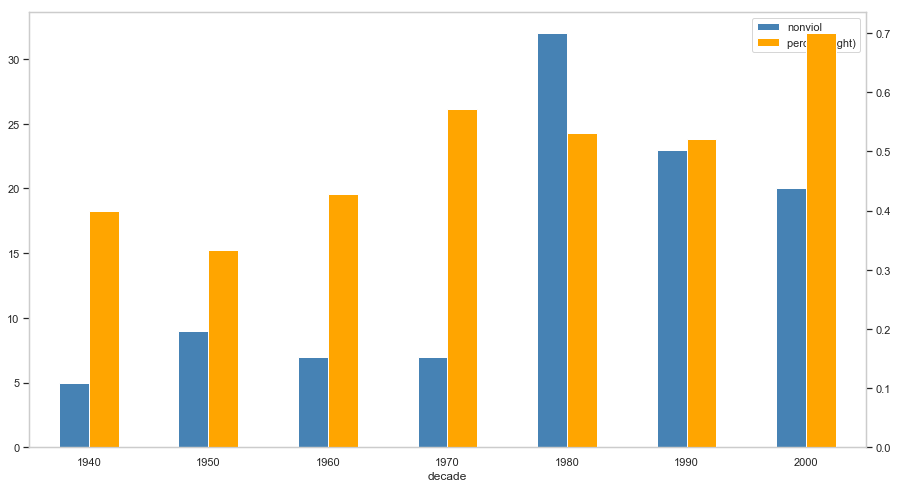

In [7]:
sns.set_style('whitegrid', {'axes.grid' : False})

#plot columns nonviol and percent (where decade is 1940 or greater) on double y axis 
ax1 = df_decades[df_decades['decade'] > 1930].plot(x = 'decade', y = ['nonviol', 'percent'], 
                                                                    secondary_y = 'percent', 
                                                                    kind = 'bar',
                                                                    figsize=(15, 8), 
                                                                    rot= 0, 
                                                                    color = ['steelblue', 'orange'])

## 3: Success Rate by Decade

In [8]:
#finding violent campaigns and no of successes per decade
grouped_data3 = df[df['viol'] == 1].groupby(['decade'])['success', 'viol'].sum()

#merging new data with the ones about nonviolen campaigns
df_success = df_decades[df_decades['decade']>1930].merge(grouped_data3.reset_index(), on = 'decade')

#renaming columns
df_success.rename(columns={'success_x':'nonviolent success',
                           'percent':'nonviolent percent', 
                           'success_y':'success violent'}, inplace = True)

#calculating percentage of success for violent campaigns
df_success['violent percent'] = df_success['success violent']/df_success['viol']

df_success

,decade,nonviolent success,nonviol,nonviolent percent,success violent,viol,violent percent
0,1940,2,5,0.400000,7,21,0.333333
1,1950,3,9,0.333333,7,19,0.368421
2,1960,3,7,0.428571,4,17,0.235294
3,1970,4,7,0.571429,10,26,0.384615
4,1980,17,32,0.531250,5,13,0.384615
5,1990,12,23,0.521739,12,45,0.266667
6,2000,14,20,0.700000,3,22,0.136364


Text(0,0.5,'success rate')

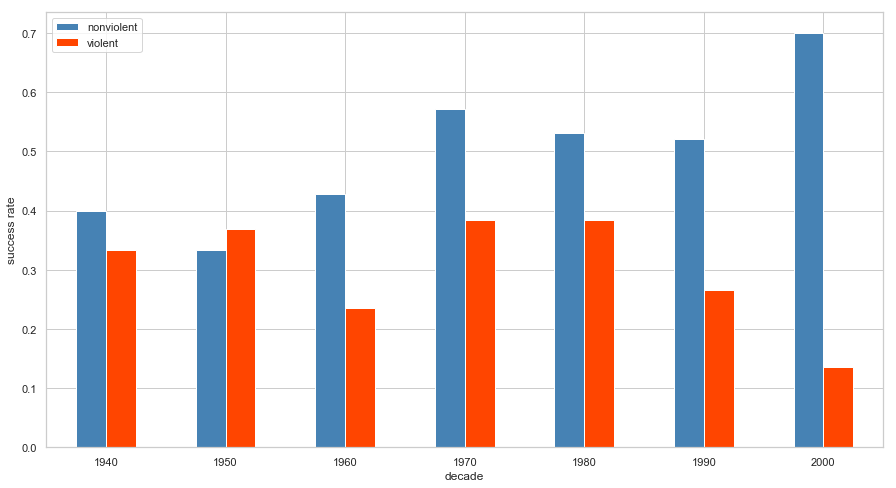

In [9]:
#draw bar plot
sns.set_style('whitegrid', {'axes.grid' : True})
diag3 = df_success[['nonviolent percent', 'violent percent']].set_index(df_success['decade']).plot(kind = 'bar', 
                                                                                           figsize =(15, 8), 
                                                                                           color = ['steelblue', 'orangered'], 
                                                                                           rot = 0)
#change legend
diag3.legend(['nonviolent','violent'])
#change labels of plot
plt.xlabel('decade')
plt.ylabel('success rate')

## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

In [10]:
#columns used in top25 dataframe
cols = ['peakmembership', 'byear', 'eyear', 'location', 'target', 'viol', 'nonviol', 'success']

#new dataframe - biggest to smallest participation
top25 = df[cols].sort_values('peakmembership', ascending = False).head(25)

#resetting the index to 0 - 24 and deleting old index column
top25 = top25.reset_index()
del top25['index']

top25

,peakmembership,byear,eyear,location,target,viol,nonviol,success
0,4500000.0,1937,1945,China,Japanese occupation,1,0,0
1,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,1,1
2,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,1,1
3,1000000.0,1988,1988,Burma,military junta,0,1,0
4,1000000.0,1989,1989,China,Communist regime,0,1,0
5,1000000.0,1967,1968,China,anti-Maoists,1,0,0
6,1000000.0,1922,1949,China,Kuomintang regime,1,0,1
7,1000000.0,2006,2006,Mexico,Calderon regime,0,1,0
8,1000000.0,2005,2005,Lebanon,Syrian forces,0,1,1
9,1000000.0,1993,1999,Nigeria,Military rule,0,1,1


Greece is in number 17 of the "Top 25 largest campaigns" list. Campaign was not violent and was successful.

## 5. The Effect of Participation on the Probability of Campaign Success

In [23]:
from statsmodels.formula.api import logit

#running logistic regression
log_reg = logit("success ~ mempc + lnpop", df).fit()

#results
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-12-01 12:03 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

* One unit increase in `mempc` brings an increase of 4.4892 in the log odds of having a successful campaign.
* One unit increase in `lnpop` brings an increase of 0.0907 in the log odds of having a successful campaign.
* From the intercept we get that if all variables are equal to 0, then the log odds of having a successful campaign is -5.8199, quite low
* P- value of lnpop is 0.4803. This means that there is not strong evidence against the Null Hypothesis, that there is no relationship between lnpop and success. Therefore it could be eliminated from the model.

Text(0,0.5,'Probability of success')

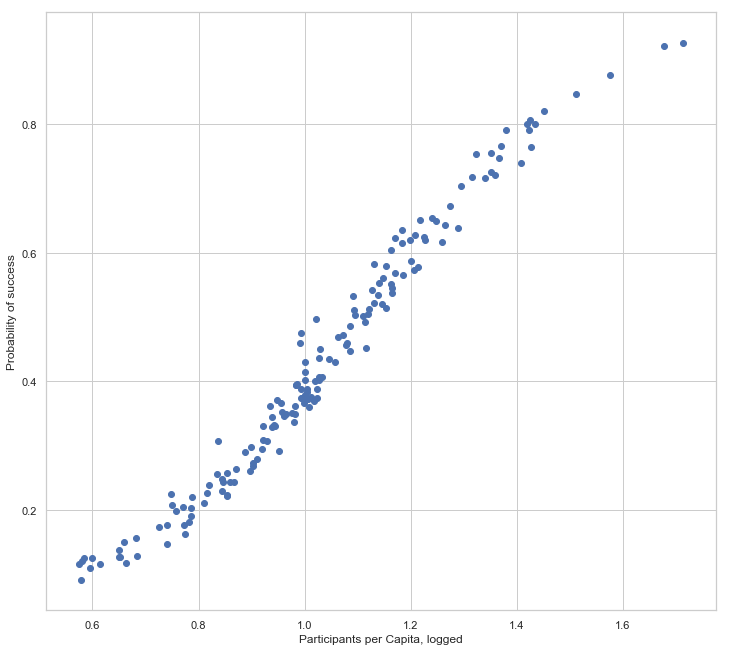

In [24]:
import numpy as np

fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(111)

#set x axis
x = df['mempc']

#y axis values are calculated using the logistic regression probability formula
df['probability'] = 1/(1 + np.exp(-(0.0907*df['lnpop'] + 4.4892*x - 5.8199)))
y = df['probability']

#plot and label axes
ax.scatter(x, y)
ax.set_xlabel("Participants per Capita, logged")
ax.set_ylabel("Probability of success")


## 6. The Level of Participation Tipping Point

The tipping point would the one that would make a difference in the outcome of the campaign. In other words, the point that would get us form an usuccessful campaign to a successful one. This, would occur when the probability of success is greater than 0.5.

In [25]:
#5 observations with probability close but less than 0.5
calc = df[['mempc', 'probability', 'lnpop', 'lmembers']][df['probability'] < 0.5].sort_values('probability', ascending = False).head(5)

#calculation of true percentage (members/location population) from lnpop and lmembers
calc['members/population'] = (np.exp(calc['lmembers']))/(np.exp(calc['lnpop']))

calc.sort_values('members/population', ascending = False)

,mempc,probability,lnpop,lmembers,members/population
248,1.113517,0.491851,8.693486,9.680344,2.682790
128,1.086403,0.485468,9.753869,10.596635,2.322782
219,1.072414,0.472677,9.881102,10.596635,2.045277
262,1.020733,0.497497,13.534897,13.815511,1.323942
265,0.992762,0.474774,13.916239,13.815511,0.904179


In [26]:
#5 observations with probability close but greater than 0.5
calc1 = df[['mempc', 'probability', 'lnpop', 'lmembers']][df['probability'] >= 0.5].sort_values('probability', ascending = True).head(5)

#calculation of true percentage (members/location population) from lnpop and lmembers

calc1['members/population'] = (np.exp(calc1['lmembers']))/(np.exp(calc1['lnpop']))

calc1.sort_values('members/population', ascending = False)

,mempc,probability,lnpop,lmembers,members/population
72,1.121430,0.512048,9.192685,10.308952,3.053435
177,1.119458,0.504822,8.971530,10.043249,2.920396
216,1.110516,0.501850,9.283026,10.308952,2.789679
269,1.092927,0.510475,10.534025,11.512925,2.661527
299,1.096068,0.502749,10.037786,11.002100,2.622986


We use the Shapiro-Wilk test to see if the percentages of the population follow the normal distribution. For a confidence level of 5% we do not reject the null hypothesis that the data follow the Normal Distribution.

In [27]:
from scipy.stats import shapiro

#calculate percentages
percentages = calc['members/population'].append(calc1['members/population'])

#calculate p value
stat, p = shapiro(percentages)
print('Statistics=', stat, ' p=', p)


Statistics= 0.8511906862258911  p= 0.060014575719833374


Based on the following, the participants of a successful campaign would be about 2.33 times the population of the area.

In [28]:
percentages.mean()

2.3326994326748696

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

#### 7.1 Logistic regression controlling `tpolity`


In [29]:
#creating the log(peakmembership) column
df['logpeakmembership'] = np.log(df.loc[:, ['peakmembership']])

#running logistic regression
log_reg = logit("success ~ nonviol + tpolity + logpeakmembership + lnpop", df).fit()

#results
log_reg.summary2()


Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-12-01 12:03 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.1085   1.4130 -0.0768 0.9388 -2.8779  2.6609
nonviol            0.9048   0.4636  1.9517 0.0510 -0.0038  1.8134
tpolity            0.0520   0.0298  1.7439 0.0812 -0.0064  0.1104
logpeakmembership  0.3751   0.1282  2.9264 0.0034  0.1239  0.6263
lnpop             -0.4363   0.1423 -3.0671 0.0022 -0.7151 -0.1575
=================================================================

"""

* One unit increase in `nonviol` brings an increase of 0.9048 in the log odds of having a successful campaign. Since nonviol is binary, this means that a non-violent campaign increases the chance of succeeding by 90% compared to a violent one.
* One unit increase in `tpolity` brings an increase of 0.0520 in the log odds of having a successful campaign. P-value of the variable is ~ 0.08, which for a significance level of α=5% does not give strong evidence against the Null Hypothesis (Null Hypothesis being that there is a relationship between the variable and the success of a campaign).
* One unit increase in `logged peakmembership` brings an increase of 0.3751 in the log odds of having a successful campaign.
* One unit increase in `lnpop` brings a decrease of 0.4363 in the log odds of having a successful campaign. Thus, it affects the chances of succeeding in a negative way.
* From the intercept we get that if all variables are equal to 0, then the log odds of having a successful campaign is -0.1085.